# Import Libaries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.shape

(202, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

# Exploratory Data Analysis (EDA)

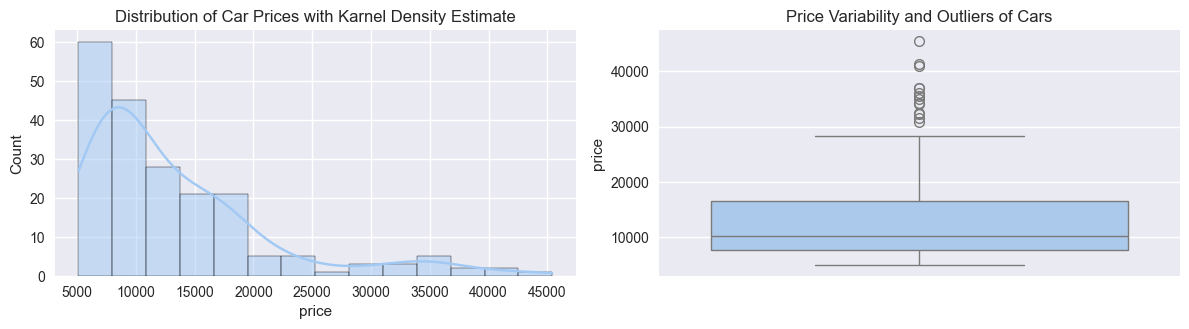

<Axes: title={'center': 'Corelation Among Car Features and their Prices'}>

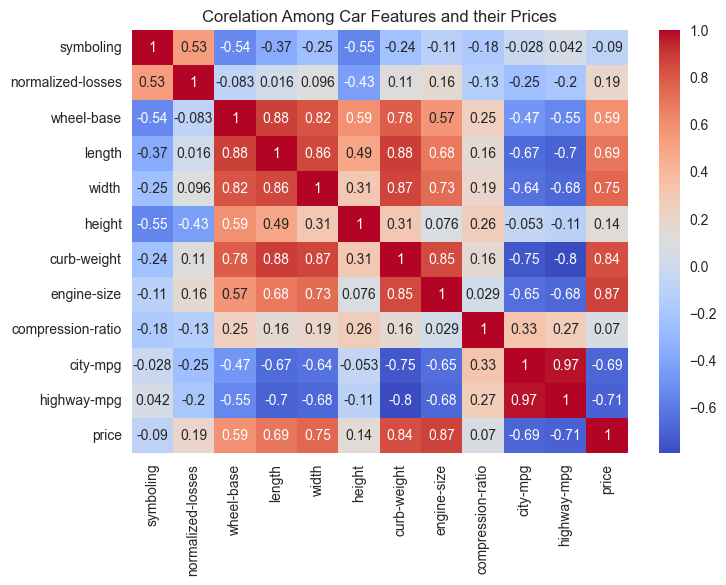

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df["price"], kde=True)
plt.title("Distribution of Car Prices with Karnel Density Estimate")
plt.subplot(2, 2, 2)
sns.boxplot(y=df["price"])
plt.title("Price Variability and Outliers of Cars")
plt.tight_layout()
plt.show()
co_mtx = df.corr(numeric_only=True)
# print(co_mtx)
plt.title("Corelation Among Car Features and their Prices")
sns.heatmap(co_mtx, cmap="coolwarm", annot=True)

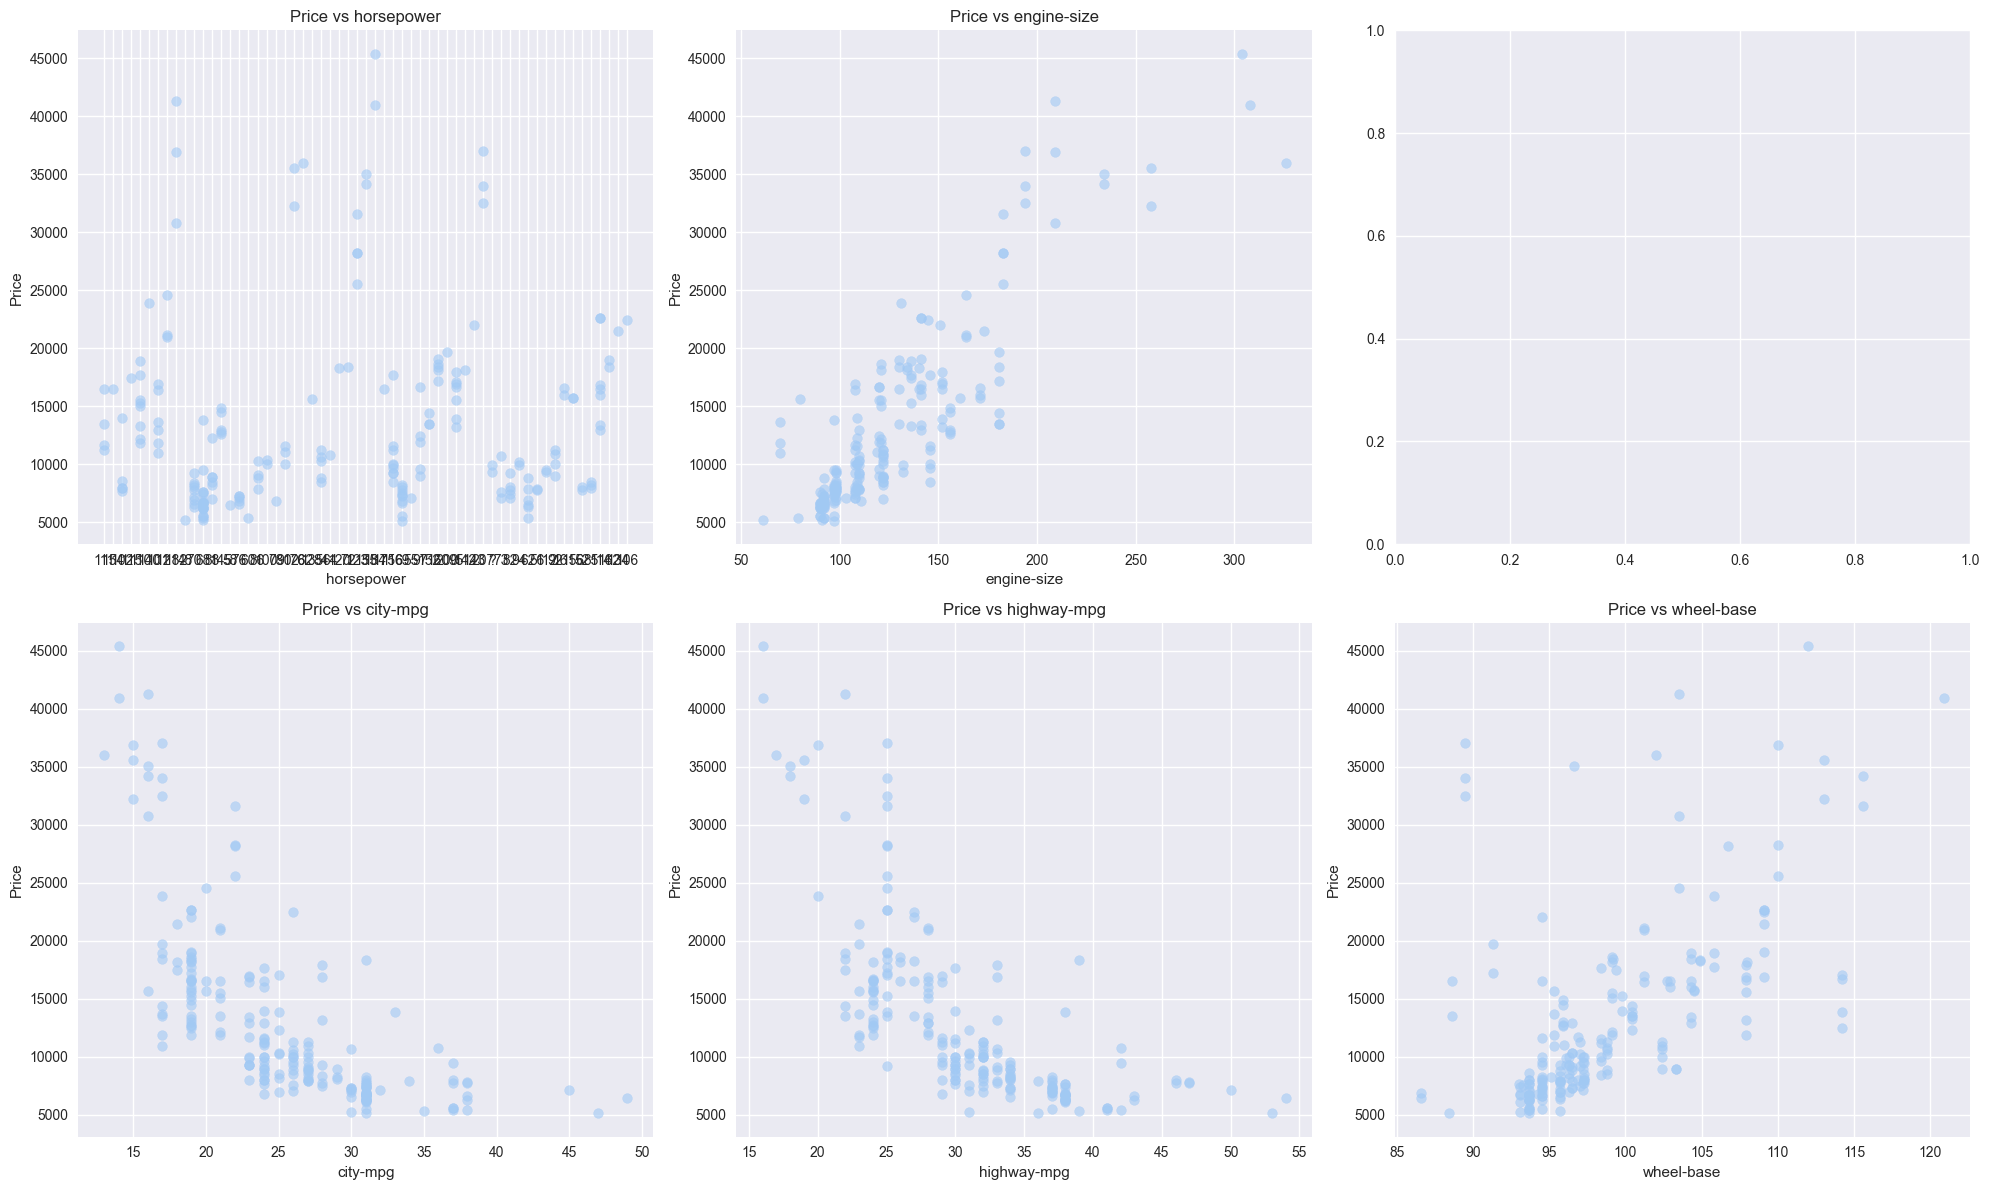

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
numerical_features = ["horsepower", "engine-size", "curb-height", "city-mpg", "highway-mpg", "wheel-base"]
for i, feature in enumerate(numerical_features):
    if feature in df.columns:
        axes[i].scatter(df[feature], df["price"], alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Price")
        axes[i].set_title(f"Price vs {feature}")
plt.tight_layout()
plt.show()

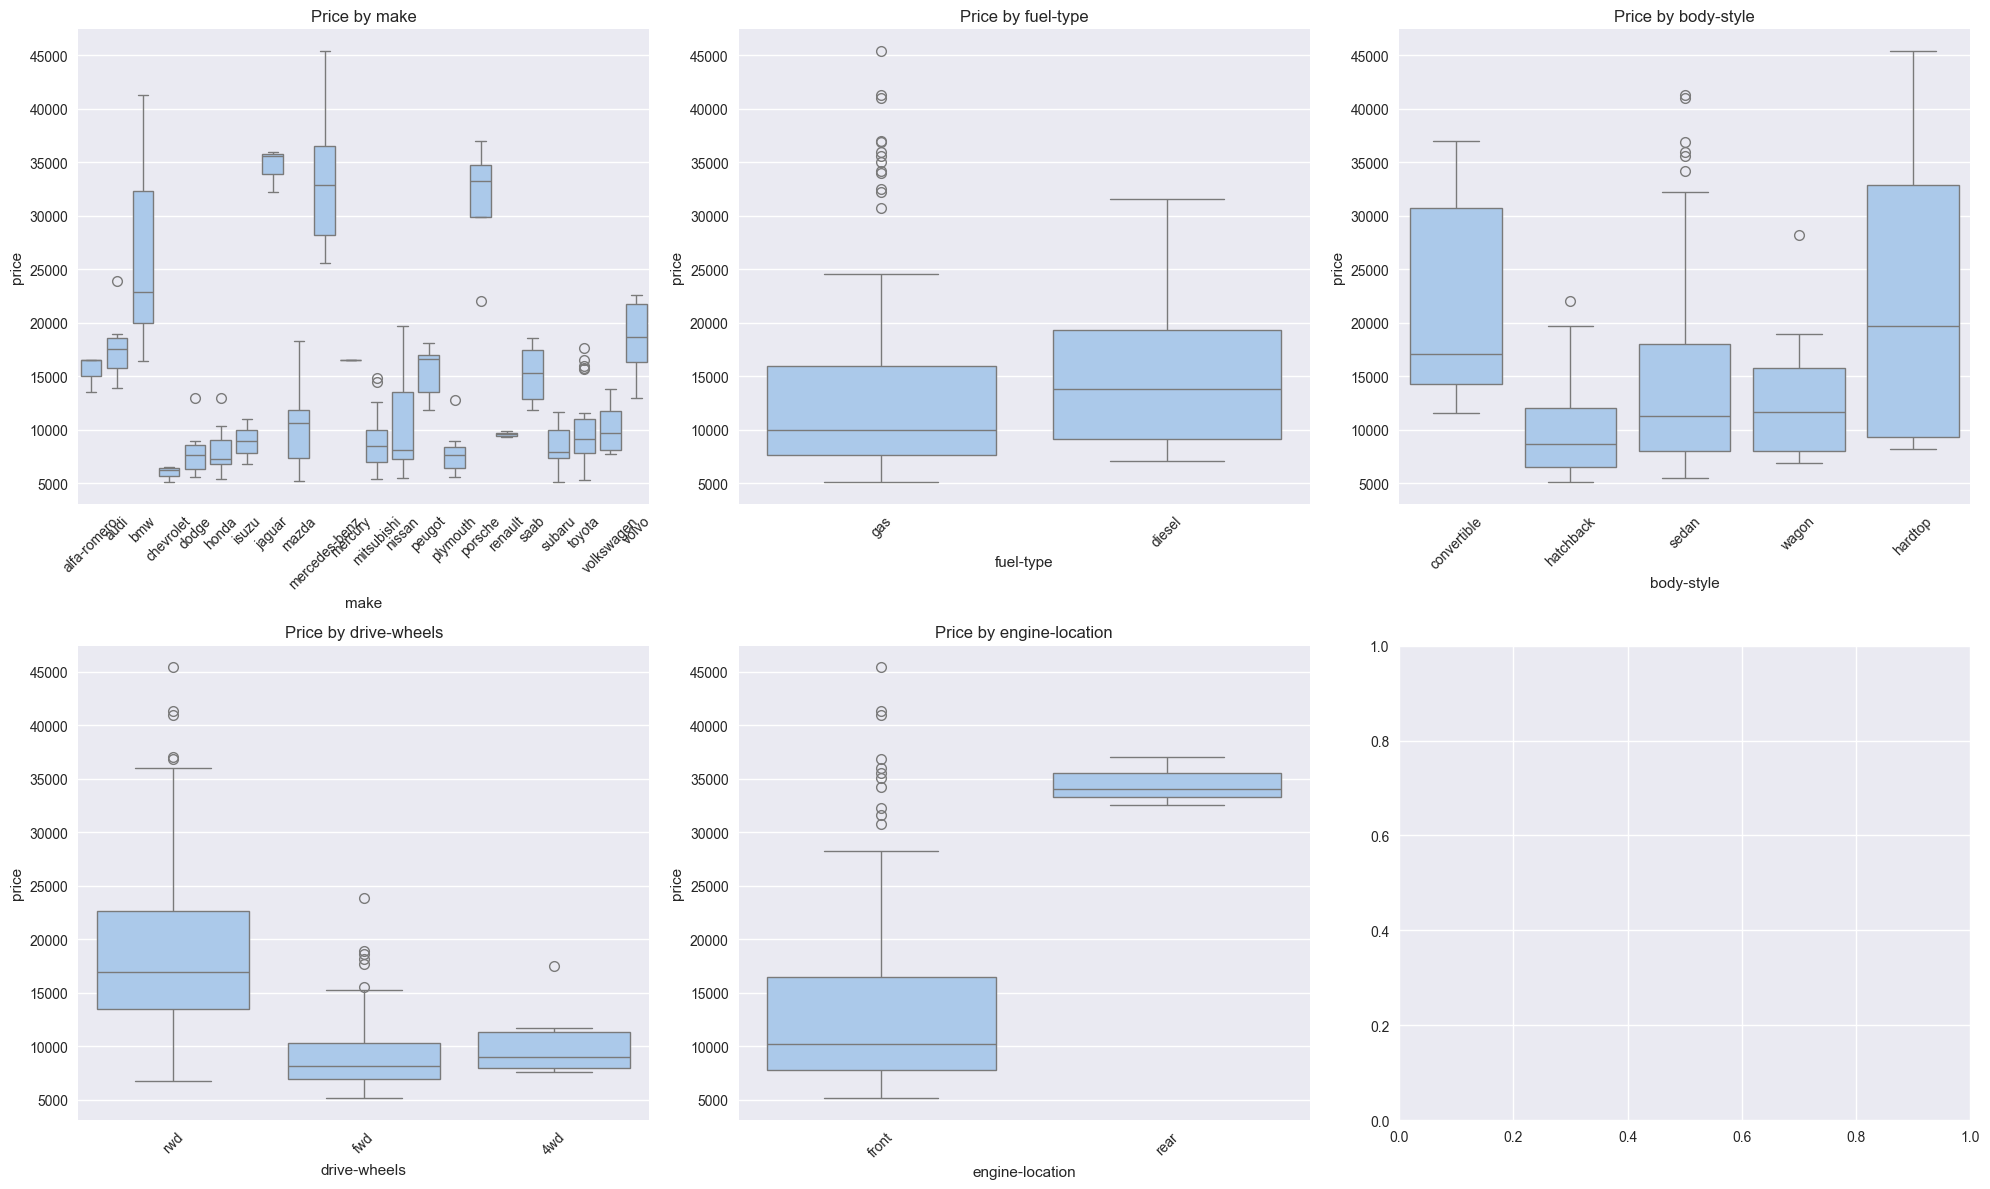

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
categorical_features = ["make", "fuel-type", "body-style", "drive-wheels", "engine-location"]
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], y=df["price"])
    plt.xticks(rotation=45)
    plt.title(f"Price by {feature}")
plt.tight_layout()
plt.show()

# Handling Missing Data

In [12]:
print("Missing values per column:")
print(df.isnull().sum())

# Mean Imputation for 'normalized-losses'
mean_value = df['normalized-losses'].mean()
df['normalized-losses'] = df['normalized-losses'].fillna(mean_value)

# Mode Imputation for 'num-of-doors'
mode_value = df['num-of-doors'].mode()[0]  
df['num-of-doors'] = df['num-of-doors'].fillna(mode_value)

print("After imputation:")
print(df.isnull().sum())

Missing values per column:
symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64
After imputation:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight        

# Feature Engineering

In [21]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df["engine-size"] = pd.to_numeric(df["engine-size"], errors="coerce")
df["compression-ratio"] = pd.to_numeric(df["compression-ratio"], errors="coerce")
df["avg_mpg"] = (df["city-mpg"] + df["highway-mpg"]) / 2
df["engine-efficiency"] = df["horsepower"] / df["engine-size"]
df["performance_score"] = df["horsepower"] * df["compression-ratio"] / 10
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg_mpg,engine-efficiency,performance_score
0,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000,21,27,13495,24.0,0.853846,99.90
1,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000,21,27,16500,24.0,0.853846,99.90
2,1,121.836364,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000,19,26,16500,22.5,1.013158,138.60
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,3.4,10.0,102.0,5500,24,30,13950,27.0,0.935780,102.00
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,3.4,8.0,115.0,5500,18,22,17450,20.0,0.845588,92.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160.0,5300,19,25,19045,22.0,1.134752,139.20
198,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134.0,5500,18,23,21485,20.5,0.774566,117.92
199,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.4,23.0,106.0,4800,26,27,22470,26.5,0.731034,243.80
200,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,9.5,114.0,5400,19,25,22625,22.0,0.808511,108.30


# Data Preprocessing

In [32]:
from sklearn.impute import SimpleImputer
label_encoders = {}
for col in df.select_dtypes(include=["object", "category"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    
X = df.drop("price", axis=1)
y = df["price"]

if X.isnull().sum().any:
    imputer = SimpleImputer(strategy="mean")
    X = imputer.fit_transform(X)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training

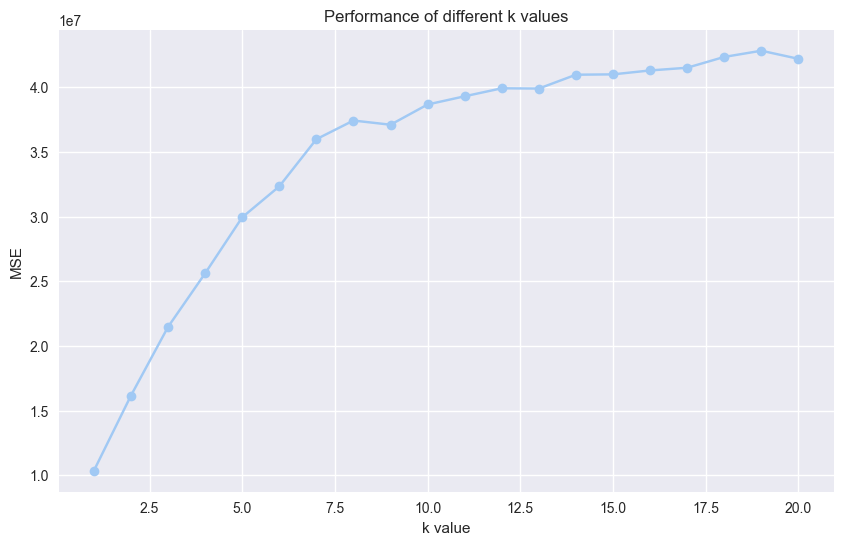

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

k_values = range(1, 21)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker="o")
plt.xlabel("k value")
plt.ylabel("MSE")
plt.title("Performance of different k values")
plt.show()

optimal_k = k_values[np.argmin(mse_values)]
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
    

# Model evaluation

Linear Regression Performance:
MSE: 14878867.00
RMSE: 3857.31
MAE: 2401.66
R^2 Score: 0.8341
KNN (k=1) Performance:
MSE: 10357823.33
RMSE: 3218.36
MAE: 2183.46
R^2 Score: 0.8845
{'MSE': np.float64(14878866.995136563), 'RMSE': np.float64(3857.3134426873535), 'MAE': np.float64(2401.6571497875593), 'R2': 0.8341143661975009}
{'MSE': np.float64(10357823.327868853), 'RMSE': np.float64(3218.357240560602), 'MAE': np.float64(2183.4590163934427), 'R2': 0.8845198301645236}


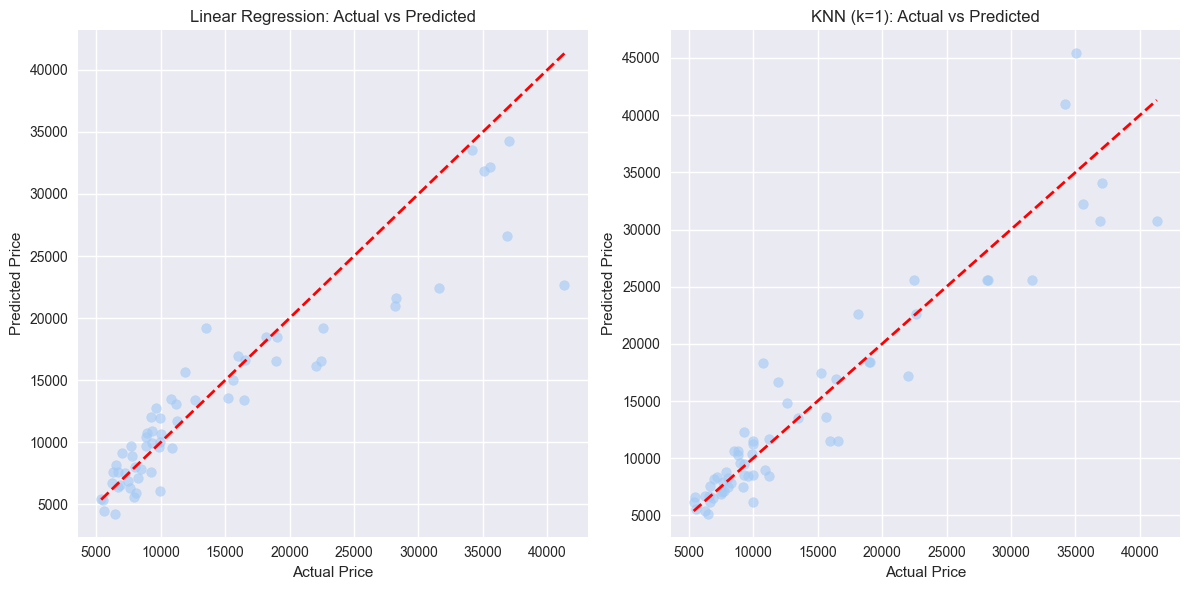

In [52]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2 Score: {r2:.4f}")

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")
knn_metrics = evaluate_model(y_test, knn_pred, f"KNN (k={optimal_k})")

# print(lr_metrics)
# print(knn_metrics)

fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].scatter(y_test, lr_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].set_title("Linear Regression: Actual vs Predicted")

axes[1].scatter(y_test, knn_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title(f"KNN (k={optimal_k}): Actual vs Predicted")

plt.tight_layout()
plt.show()

# Summary and Insights

In [54]:
print("="*150)
print("Car Price Prediction Analysis Summary")
print("="*150)

print("\n1. Data Overview")
print(f"Total Samples: {len(df)}")
print(f"Number of Features: {len(df.columns)}")
print(f"Price Range: ${df["price"].min():,.0f} to ${df["price"].max():,.0f}")

print("\n2. Key Insights from EDA:")
print("Strong positive corelation with price: curb-weight, engine-size.")
print("Strong negative corelation with price: city-mpg, highway-mpg.")

print("\n3. Feature Engineering Results:")
print("Created 3 new features: avg mpg, engine efficiency and performance score.")
print("Engine efficiency and performance score showed good predictive power.")

print("\n4. Model Performance Comparison:")
print(f"Linear Regression - R²: {lr_metrics['R2']:.4f}, RMSE: {lr_metrics['RMSE']:.2f}")
print(f"KNN Regression - R²: {knn_metrics['R2']:.4f}, RMSE: {knn_metrics['RMSE']:.2f}")

print("\n5. Recommendations:")
print("KNN Regression performed better for this dataset.")
print("Focus on engine size, curb-weight, city-mpg and highway-mpg for price predcition.")
print("The engineered features showed robust predictive power.")

print("\n6. Business Implications:")
print("Car manufacturers can optimize pricing strategy.")
print("Consumers can better understand price determinants.")
print("Dealers can use this for valuation and inventory management.")

Car Price Prediction Analysis Summary

1. Data Overview
Total Samples: 202
Number of Features: 29
Price Range: $5,118 to $45,400

2. Key Insights from EDA:
Strong positive corelation with price: curb-weight, engine-size.
Strong negative corelation with price: city-mpg, highway-mpg.

3. Feature Engineering Results:
Created 3 new features: avg mpg, engine efficiency and performance score.
Engine efficiency and performance score showed good predictive power.

4. Model Performance Comparison:
Linear Regression - R²: 0.8341, RMSE: 3857.31
KNN Regression - R²: 0.8845, RMSE: 3218.36

5. Recommendations:
KNN Regression performed better for this dataset.
Focus on engine size, curb-weight, city-mpg and highway-mpg for price predcition.
The engineered features showed robust predictive power.

6. Business Implications:
Car manufacturers can optimize pricing strategy.
Consumers can better understand price determinants.
Dealers can use this for valuation and inventory management.
